<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS

# Clustering

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


## K-means
Basic clustering algorithm.
![kmeans](https://i1.wp.com/www.learnbymarketing.com/wp-content/uploads/2015/01/method-k-means-steps-example.png)

Popular because it's easy to implement an understand. However, very sensitive to initialization state.

Since we use libraries, we should choose algorithms based on performance.

In [2]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True, as_frame=True) # We are only going to use x!
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


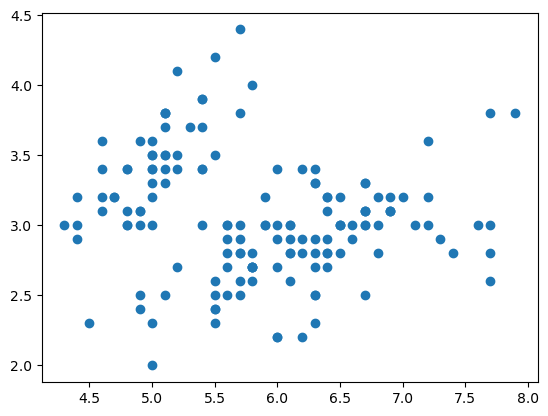

In [3]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1])

plt.show()

### Custom implementation

In [4]:
def distance(a, b):
    '''Euclidean distance'''
    return np.sqrt(((a - b)**2).sum())

def find_closest_centroid(x):
    return centroids.apply(lambda c: distance(x, c), axis=1).idxmin()

labels = np.random.choice(range(2), size=len(x))

for i in range(10):
    centroids = x.groupby(labels).mean()
    labels = x.apply(find_closest_centroid, axis=1)

In [5]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int64

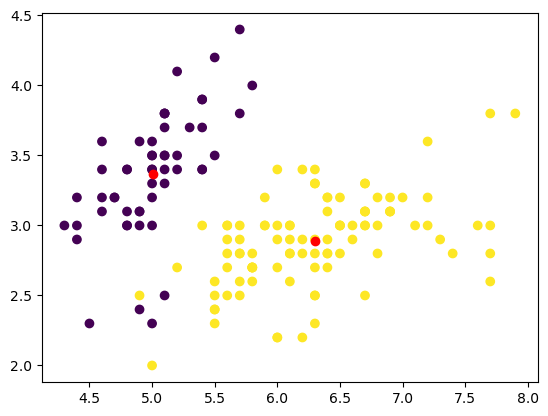

In [6]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='red')

plt.show()

### Comparison to sklearn

In [7]:
from sklearn.cluster import KMeans

sk_model = KMeans(n_clusters=10) # n_clusters is the K in K-means.
sk_model.fit(x)

KMeans(n_clusters=10)

In [8]:
sk_model.labels_

array([1, 8, 8, 8, 1, 9, 8, 1, 8, 8, 9, 1, 8, 8, 9, 9, 9, 1, 9, 1, 1, 1,
       8, 1, 1, 8, 1, 1, 1, 8, 8, 1, 9, 9, 8, 8, 1, 1, 8, 1, 1, 8, 8, 1,
       1, 8, 1, 8, 1, 1, 7, 7, 7, 4, 7, 4, 7, 3, 7, 4, 3, 4, 4, 7, 4, 7,
       4, 4, 7, 4, 0, 4, 0, 7, 7, 7, 7, 7, 7, 3, 4, 3, 4, 0, 4, 7, 7, 7,
       4, 4, 4, 7, 4, 3, 4, 4, 4, 7, 3, 4, 2, 0, 6, 2, 2, 6, 4, 6, 2, 5,
       2, 0, 2, 0, 0, 2, 2, 5, 6, 0, 2, 0, 6, 0, 2, 6, 0, 0, 2, 6, 6, 5,
       2, 0, 0, 6, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
# Because centroids are stored in the model, we can use them to assign classes to new data points.
# Not really a prediction! Since in an unsupervised setting, we are not predicting existing labels.
sk_model.predict(x)

array([1, 8, 8, 8, 1, 9, 8, 1, 8, 8, 9, 1, 8, 8, 9, 9, 9, 1, 9, 1, 1, 1,
       8, 1, 1, 8, 1, 1, 1, 8, 8, 1, 9, 9, 8, 8, 1, 1, 8, 1, 1, 8, 8, 1,
       1, 8, 1, 8, 1, 1, 7, 7, 7, 4, 7, 4, 7, 3, 7, 4, 3, 4, 4, 7, 4, 7,
       4, 4, 7, 4, 0, 4, 0, 7, 7, 7, 7, 7, 7, 3, 4, 3, 4, 0, 4, 7, 7, 7,
       4, 4, 4, 7, 4, 3, 4, 4, 4, 7, 3, 4, 2, 0, 6, 2, 2, 6, 4, 6, 2, 5,
       2, 0, 2, 0, 0, 2, 2, 5, 6, 0, 2, 0, 6, 0, 2, 6, 0, 0, 2, 6, 6, 5,
       2, 0, 0, 6, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

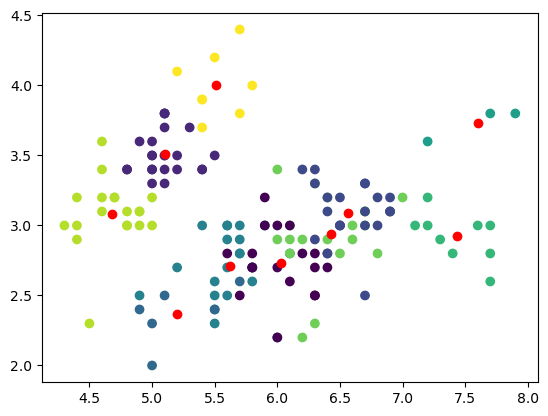

In [10]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=sk_model.labels_)
plt.scatter(sk_model.cluster_centers_[:, 0], sk_model.cluster_centers_[:, 1], c='red')

plt.show()

## Model selection

The finer the granularity the better the fit, but the clustering is less meaningful. In many cases, domain knowledge can guide us to choose a meaningful value for _k_, but if this is not the case we need to figure out what a sensible _k_ looks like for our data set.

### Elbow method (scree plot)

Visually assess the optimal _k_. Simple to implement but somewhat subjective method.

In [11]:
n = 10
scores = []
for i in range(1, n):
    sk_model = KMeans(n_clusters=i)
    sk_model.fit(x)
    scores.append(sk_model.score(x))

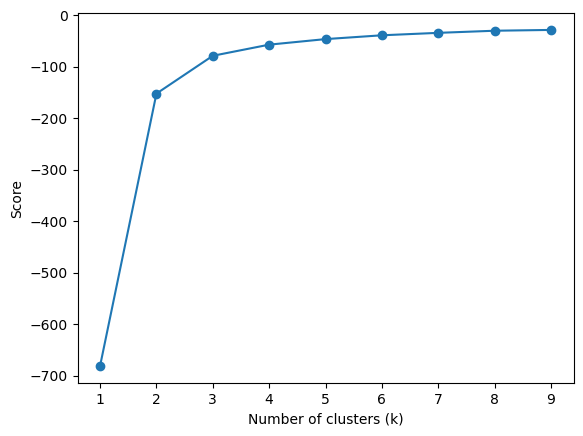

In [12]:
plt.scatter(range(1, n), scores)
plt.plot(range(1, n), scores)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.show()

### Information criteria

Objective methods to assign a numerical score to every _k_. It balances the tradeoff between model fit and complexity.

#### Calinski-Harabasz (CH) index
A good (high) CH index:
- Maximizes intercluster distances
- Minimizes intracluster variances
- Minimizes the number of clusters

In [13]:
from sklearn.metrics import calinski_harabasz_score

n = 10
ch_scores = []
for i in range(2, n): # Can't compute that score for 1 cluster.
    sk_model = KMeans(n_clusters=i)
    sk_model.fit(x)
    ch = calinski_harabasz_score(x, sk_model.labels_)
    ch_scores.append(ch)

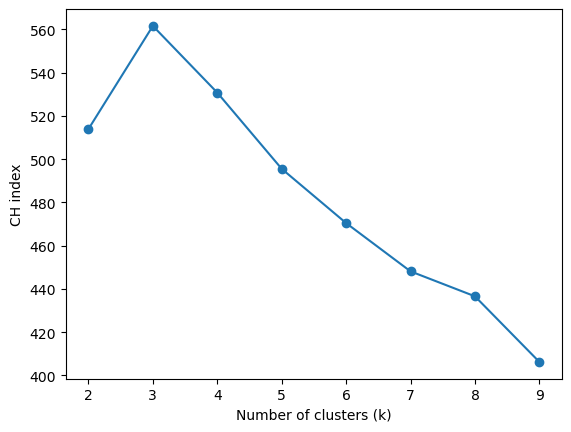

In [14]:
plt.scatter(range(2, n), ch_scores)
plt.plot(range(2, n), ch_scores)

plt.xlabel('Number of clusters (k)')
plt.ylabel('CH index')

plt.show()

## Clustering != Classification
They both work on categorical data, but they are two essentially different problems.

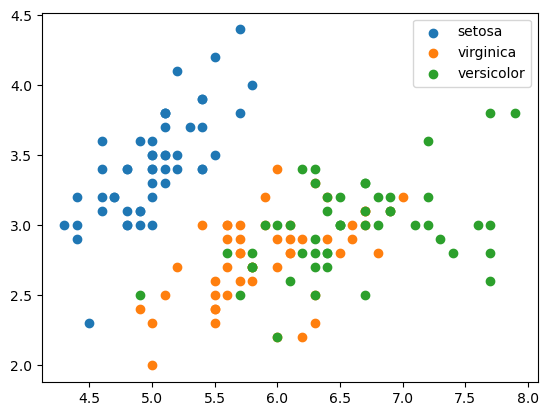

In [15]:
plt.scatter(x.iloc[:, 0][y == 0], x.iloc[:, 1][y == 0])
plt.scatter(x.iloc[:, 0][y == 1], x.iloc[:, 1][y == 1])
plt.scatter(x.iloc[:, 0][y == 2], x.iloc[:, 1][y == 2])

plt.legend(['setosa', 'virginica', 'versicolor'])

plt.show()

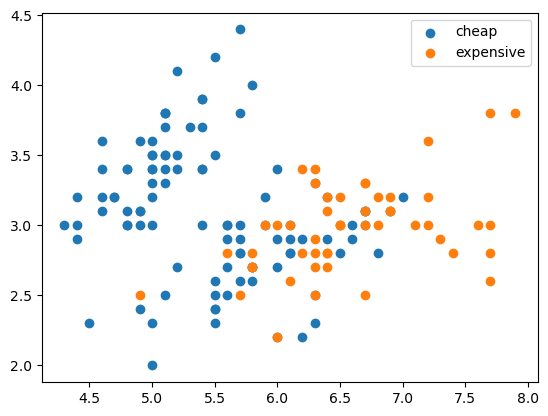

In [16]:
plt.scatter(x.iloc[:, 0][y != 2], x.iloc[:, 1][y != 2])
plt.scatter(x.iloc[:, 0][y == 2], x.iloc[:, 1][y == 2])

plt.legend(['cheap', 'expensive'])

plt.show()

In this case, a 2-group clustering would likely give us the setosa-vs-rest partition, but we are interested in the versicolor-vs-rest classification.

## Hierarchical clustering

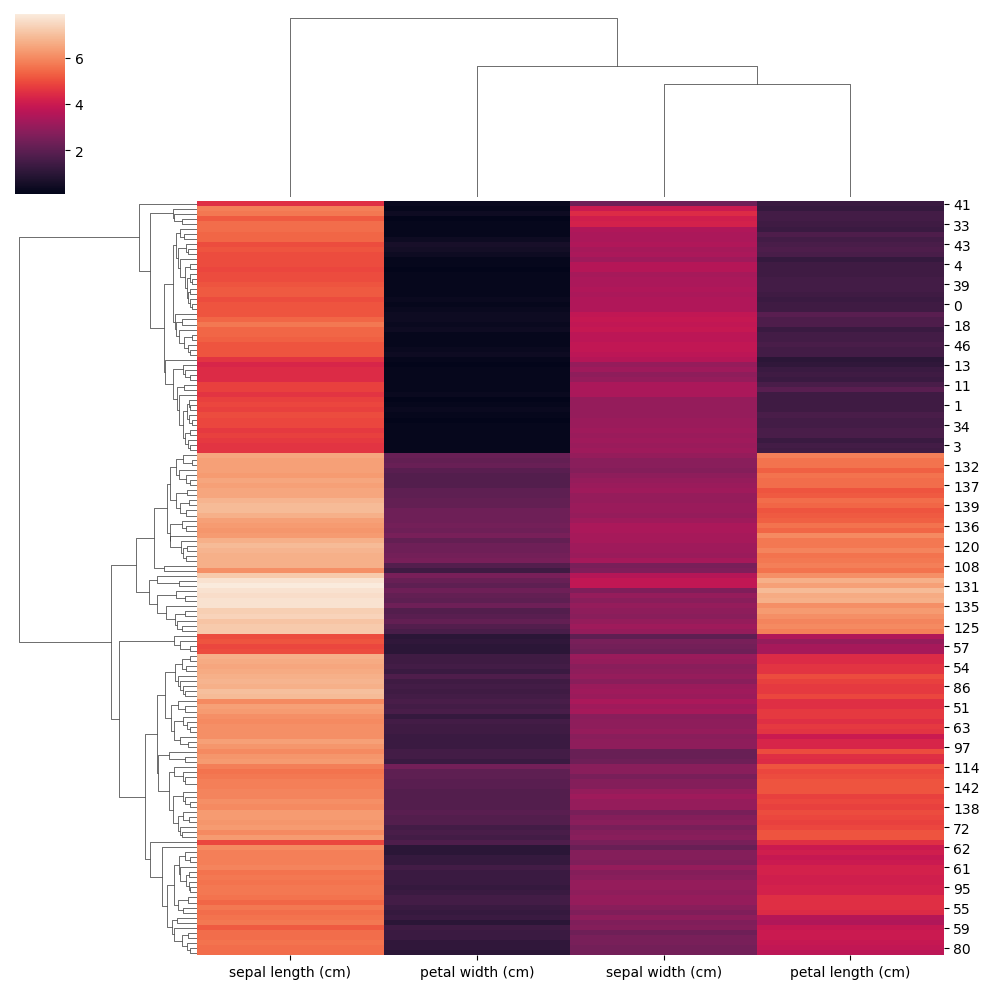

In [17]:
import seaborn as sns

sns.clustermap(x)

plt.show()

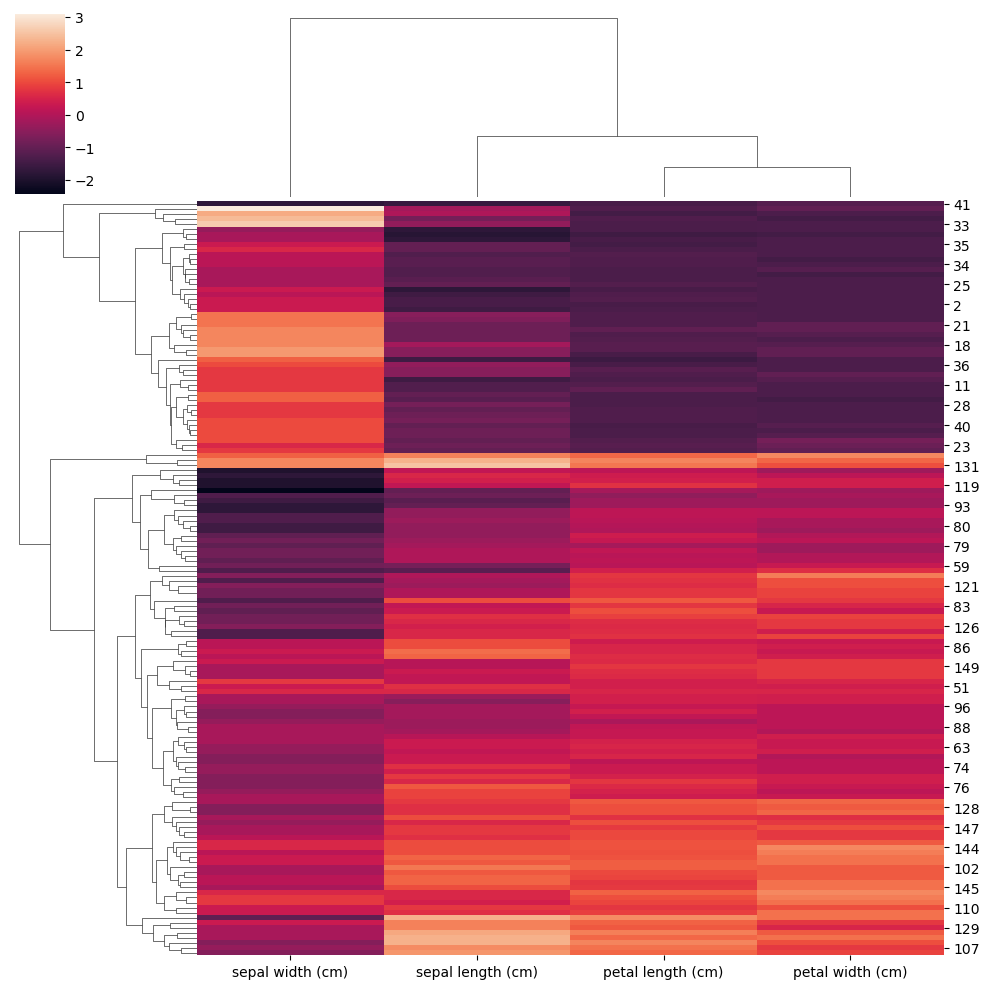

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Z-score normalization.

scaled_x = StandardScaler().fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns=x.columns)

sns.clustermap(scaled_x)

plt.show()

## A note on the continuous case: Mixture Models

We can use other models that assume a particular distribution.

Most commonly, we model the distribution of data points as a **mixture of Gaussian distributions**, in what is called a **Gaussian Mixture Model** (GMM). However, the distribution is better chosen according to the data, _e.g._ a Beta or Dirichlet distribution to model probabilities.

Mixture Models will give us, instead of a single cluster label per data point, its probability of belonging to each cluster (although we can convert those to cluster labels by selecting the cluster with highest probability).

### Model selection

The most common information criteria, the **Akaike Information Criterion** (AIC) and **Bayesian Information Criterion** (BIC) need those probabilities instead of just cluster labels, so they can't be directly used with K-means.